In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.wildcatter.environment import *

In [2]:
env_config = dict(model_path=r"examples/data/2d_stacked.csv", available_pipe=50, delim=",")

env = MultiDriller(env_config, 3)

In [3]:
env

In [4]:
env.step()

array([ -72.5, -100. ,  -95. ])

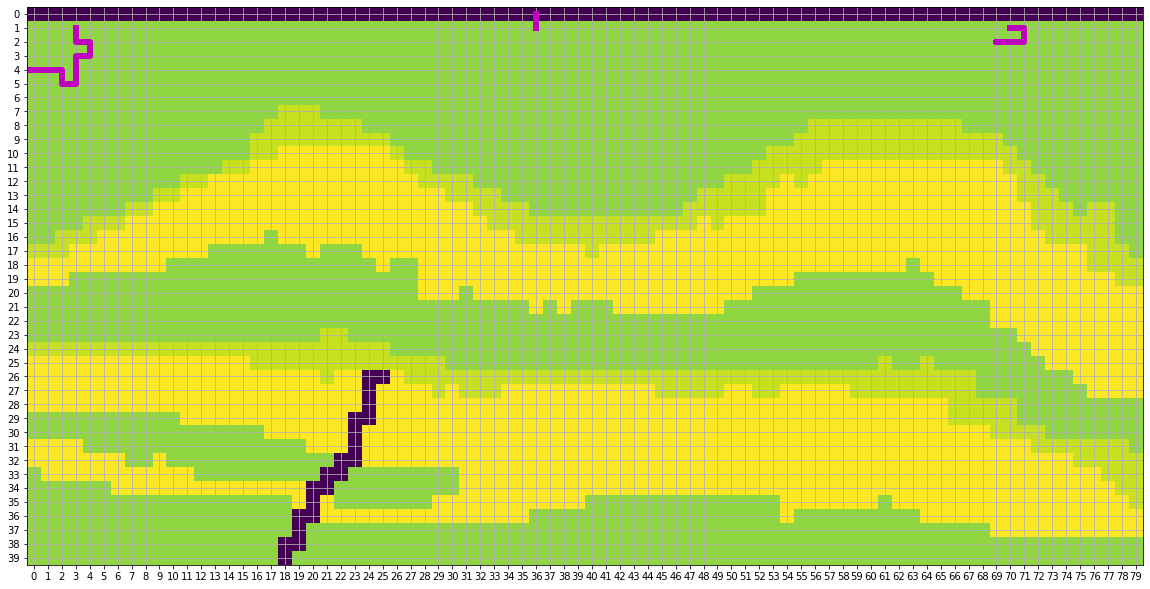

In [16]:
traj_z0, traj_x0 = np.asarray(env.getTrajectory(0)).T
traj_z1, traj_x1 = np.asarray(env.getTrajectory(1)).T
traj_z2, traj_x2 = np.asarray(env.getTrajectory(2)).T

plt.figure(figsize=(20, 20))
plt.imshow(env.model, vmin=-10, vmax=2)
plt.plot(traj_x0, traj_z0, "-", c="m", linewidth=6)
plt.plot(traj_x1, traj_z1, "-", c="m", linewidth=6)
plt.plot(traj_x2, traj_z2, "-", c="m", linewidth=6)
plt.xticks(np.arange(0, 80, 1.0))
plt.yticks(np.arange(0, 40, 1.0))
plt.xlim([-0.5, 79.5])
plt.ylim([39.5, -0.5])
plt.grid()

In [18]:
np.asarray(env.getTrajectory(0))
env.wells[0].action_space.sample()

1

In [17]:
from stable_baselines3 import PPO

model = PPO("MlpPolicy", env.wells[0], verbose=1)
model.learn(total_timesteps=50_000, log_interval=10)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 28.4         |
|    ep_rew_mean          | 184          |
| time/                   |              |
|    fps                  | 582          |
|    iterations           | 10           |
|    time_elapsed         | 35           |
|    total_timesteps      | 20480        |
| train/                  |              |
|    approx_kl            | 0.0051584486 |
|    clip_fraction        | 0.0407       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.623       |
|    explained_variance   | -0.109       |
|    learning_rate        | 0.0003       |
|    loss                 | 3.87e+03     |
|    n_updates            | 90           |
|    policy_gradient_loss | -0.0125      |
|    value_loss           | 9.87e+03     |
------------------------------------------
---

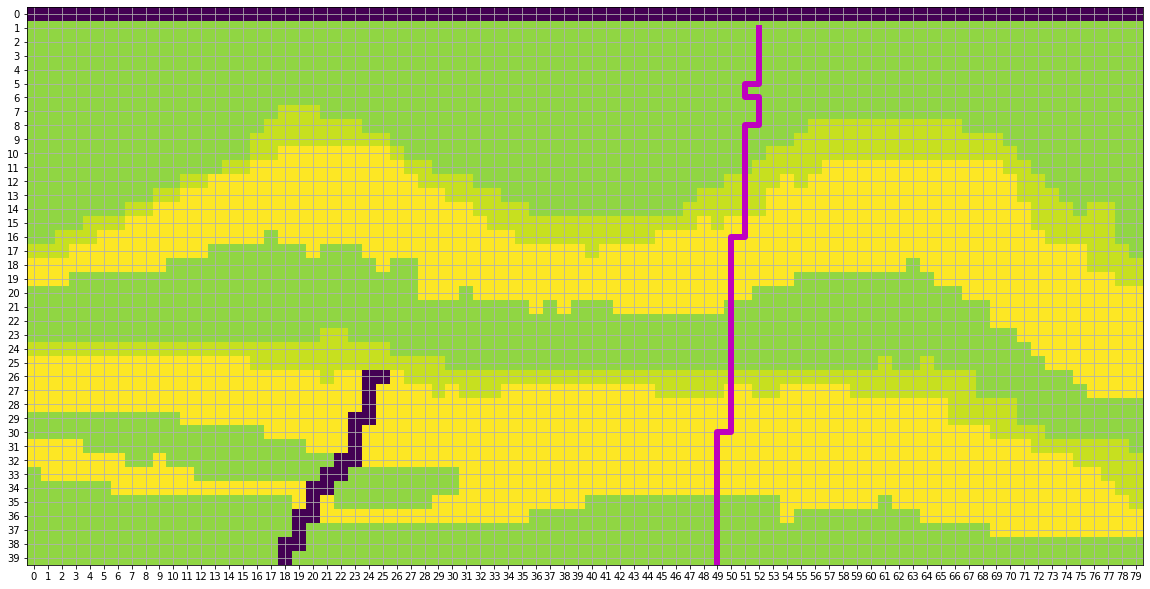

In [21]:
for episode in range(1, 2):
    state = env.wells[1].reset()
    done = False
    score = 0

    while not done:
        action, _states = model.predict(state)
        state, reward, done, info = env.wells[1].step(action)
        score += reward

# This comes in as [[row1, col1], ..., [rowN, colN]]
# Once we unpack it its z, then x.
traj_z1, traj_x1 = np.asarray(env.getTrajectory(1)).T

plt.figure(figsize=(20, 20))
plt.imshow(env.model, vmin=-10, vmax=2)
plt.plot(traj_x1, traj_z1, "-", c="m", linewidth=6)
plt.xticks(np.arange(0, 80, 1.0))
plt.yticks(np.arange(0, 40, 1.0))
plt.xlim([-0.5, 79.5])
plt.ylim([39.5, -0.5])
plt.grid()